In [2]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def load_Dataset():
    name = r'..\Datasets\GEANTCombined\all_in_one_complete_appended.csv'
    df = pd.read_csv(name, header = 0)#, parse_dates = ['timestamp'], index_col=['timestamp'])
    df = df.sort_values('timestamp')
    return df

def extract_sub_Dataframe(dataframe, source, destination):
    return dataframe[(dataframe.source == source) & (dataframe.destination == destination)][['bandwidth']]

In [4]:
df = load_Dataset()

In [5]:
# #############################################################################
# Load the data and split it into separate pieces
df_local = extract_sub_Dataframe(df, 1, 11)
#print(df_local.values.reshape(1,1000)[0])

data = df_local.values.reshape(1,11394)[0]
train, test = data[:int(len(data)*0.99)], data[int(len(data)*0.99):]
print(test.shape)
#train = data
#test = data

(114,)


In [6]:
predict = {}
conf_intervals = {}
x = 1
while x <=96:
    # Fit a simple auto_arima model
    modl = pm.auto_arima(train, error_action='ignore', trace=1, seasonal=True, m=x)
    print(modl.get_params())
    # Create predictions for the future, evaluate on test
    preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

    predict.update({x:preds})
    conf_intervals.update({x:conf_int})
    if x == 96:
        break
    
    x = x * 2
    if x == 36:
        x = x * 2
    if x > 100:
        x = 96
    # Print the error:
    #print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=208263.114, BIC=208307.098, Fit time=6.222 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=211113.286, BIC=211127.948, Fit time=0.130 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=209945.001, BIC=209966.993, Fit time=0.280 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=209472.047, BIC=209494.039, Fit time=1.650 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=208259.926, BIC=208296.580, Fit time=2.949 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=208408.834, BIC=208438.157, Fit time=2.905 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=208272.713, BIC=208316.697, Fit time=5.377 seconds


c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=208274.327, BIC=208325.642, Fit time=9.739 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=209089.024, BIC=209118.347, Fit time=2.592 seconds
Total fit time: 31.847 seconds
{'callback': None, 'disp': 0, 'maxiter': None, 'method': None, 'order': (1, 1, 2), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (0, 0, 0, 1), 'solver': 'lbfgs', 'start_params': None, 'suppress_warnings': False, 'transparams': True, 'trend': None, 'with_intercept': True}
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 2); AIC=208297.752, BIC=208341.736, Fit time=6.478 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 2); AIC=211113.286, BIC=211127.948, Fit time=0.131 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 2); AIC=209571.488, BIC=209600.811, Fit time=0.789 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 2); AIC=209505.691, BIC=209535.014, Fit time=0.848 seco

c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 2, 2); AIC=208338.686, BIC=208397.331, Fit time=13.016 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 2); AIC=209184.426, BIC=209221.079, Fit time=5.784 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 2); AIC=209131.301, BIC=209167.955, Fit time=1.586 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 2); AIC=211078.099, BIC=211107.422, Fit time=1.483 seconds
Total fit time: 58.020 seconds
{'callback': None, 'disp': 0, 'maxiter': None, 'method': None, 'order': (1, 1, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (1, 0, 1, 2), 'solver': 'lbfgs', 'start_params': None, 'suppress_warnings': False, 'transparams': True, 'trend': None, 'with_intercept': True}
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 4); AIC=208266.506, BIC=208325.152, Fit time=10.878 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 4); AIC=211113.286, BIC=211127.948, Fit time=0.130 se

c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 2, 4); AIC=208260.082, BIC=208326.058, Fit time=27.376 seconds


c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 2, 4); AIC=208234.265, BIC=208292.910, Fit time=21.575 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 4); AIC=208249.609, BIC=208300.924, Fit time=8.635 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 4); AIC=208251.452, BIC=208295.436, Fit time=6.328 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 0, 2, 4); AIC=209045.182, BIC=209096.497, Fit time=6.553 seconds


c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 4); AIC=208260.069, BIC=208326.046, Fit time=22.924 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 4); AIC=208410.922, BIC=208462.237, Fit time=17.893 seconds


c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 2, 4); AIC=208258.937, BIC=208324.914, Fit time=25.927 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 4); AIC=209249.501, BIC=209293.485, Fit time=14.534 seconds


c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 0, 2, 4); AIC=208255.003, BIC=208328.310, Fit time=31.794 seconds


c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 0, 2, 4); AIC=208239.644, BIC=208305.620, Fit time=24.243 seconds
Total fit time: 303.770 seconds
{'callback': None, 'disp': 0, 'maxiter': None, 'method': None, 'order': (1, 1, 2), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (1, 0, 2, 4), 'solver': 'lbfgs', 'start_params': None, 'suppress_warnings': False, 'transparams': True, 'trend': None, 'with_intercept': True}


c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 8); AIC=208255.740, BIC=208314.386, Fit time=21.310 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 8); AIC=211113.286, BIC=211127.948, Fit time=0.131 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 8); AIC=209945.252, BIC=209974.575, Fit time=1.261 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 8); AIC=209558.410, BIC=209587.733, Fit time=1.562 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 8); AIC=208254.336, BIC=208305.651, Fit time=13.815 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 8); AIC=208263.114, BIC=208307.098, Fit time=6.239 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 2, 8); AIC=208254.942, BIC=208313.588, Fit time=38.114 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 8); AIC=208257.665, BIC=208323.642, Fit time=44.779 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 8); AIC=208252.577, BIC=208296.561, Fit time=8.553 secon

c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 1, 8); AIC=208235.111, BIC=208286.426, Fit time=21.024 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 1, 8); AIC=209148.415, BIC=209185.069, Fit time=2.745 seconds


c:\program files\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\program files\python36\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 4) seasonal_order=(0, 0, 1, 8); AIC=208280.460, BIC=208346.437, Fit time=21.840 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 1, 8); AIC=208263.051, BIC=208321.697, Fit time=23.516 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 8); AIC=208272.713, BIC=208316.697, Fit time=5.879 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 2, 8); AIC=208263.775, BIC=208322.421, Fit time=39.184 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(1, 0, 2, 8); AIC=208266.604, BIC=208332.580, Fit time=46.128 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 1, 8); AIC=208666.068, BIC=208710.052, Fit time=11.478 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 1, 8); AIC=208274.431, BIC=208333.077, Fit time=18.214 seconds
Fit ARIMA: order=(1, 1, 4) seasonal_order=(0, 0, 1, 8); AIC=208277.216, BIC=208335.862, Fit time=24.059 seconds
Total fit time: 360.674 seconds
{'callback': None, 'disp': 0, 'maxiter': None, 'method': None, 'order': (

c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 16); AIC=208267.127, BIC=208325.772, Fit time=46.521 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 16); AIC=211113.286, BIC=211127.948, Fit time=0.133 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 16); AIC=209946.936, BIC=209976.259, Fit time=2.405 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 16); AIC=209474.035, BIC=209503.358, Fit time=12.077 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 16); AIC=208263.869, BIC=208315.183, Fit time=35.678 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 16); AIC=208263.114, BIC=208307.098, Fit time=6.441 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 16); AIC=208259.926, BIC=208296.580, Fit time=3.132 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 16); AIC=208408.834, BIC=208438.157, Fit time=3.091 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 16); AIC=208272.713, BIC=208316.697, Fit time=5.6

c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 16); AIC=208274.327, BIC=208325.642, Fit time=10.665 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 0, 16); AIC=208260.780, BIC=208304.764, Fit time=23.122 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 16); AIC=208260.801, BIC=208304.785, Fit time=19.706 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 16); AIC=208262.580, BIC=208313.895, Fit time=51.032 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 16); AIC=209089.024, BIC=209118.347, Fit time=2.560 seconds
Total fit time: 224.030 seconds
{'callback': None, 'disp': 0, 'maxiter': None, 'method': None, 'order': (1, 1, 2), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (0, 0, 0, 16), 'solver': 'lbfgs', 'start_params': None, 'suppress_warnings': False, 'transparams': True, 'trend': None, 'with_intercept': True}
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 32); AIC=208266.841, BIC=208325.487, Fit tim

c:\program files\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 32); AIC=208274.327, BIC=208325.642, Fit time=10.232 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 0, 32); AIC=208261.739, BIC=208305.723, Fit time=68.022 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 32); AIC=208261.734, BIC=208305.719, Fit time=76.201 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 32); AIC=208263.447, BIC=208314.761, Fit time=73.866 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 32); AIC=209089.024, BIC=209118.347, Fit time=2.555 seconds
Total fit time: 526.802 seconds
{'callback': None, 'disp': 0, 'maxiter': None, 'method': None, 'order': (1, 1, 2), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (0, 0, 0, 32), 'solver': 'lbfgs', 'start_params': None, 'suppress_warnings': False, 'transparams': True, 'trend': None, 'with_intercept': True}


KeyboardInterrupt: 

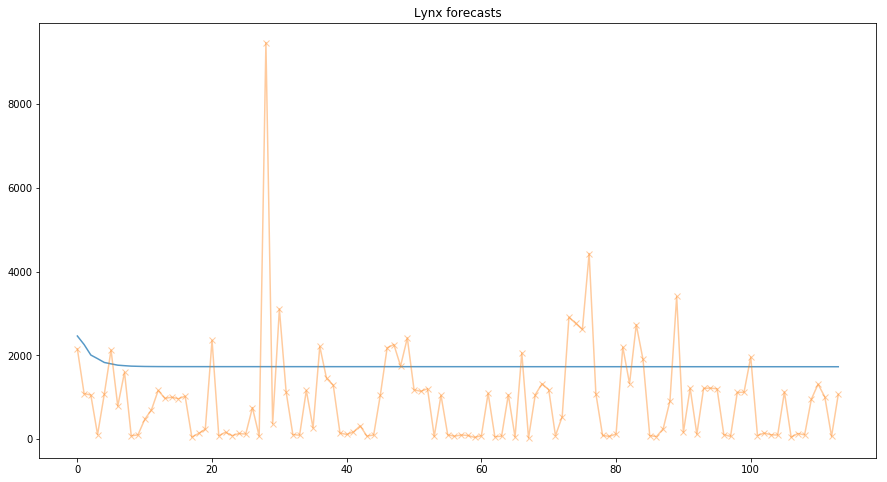

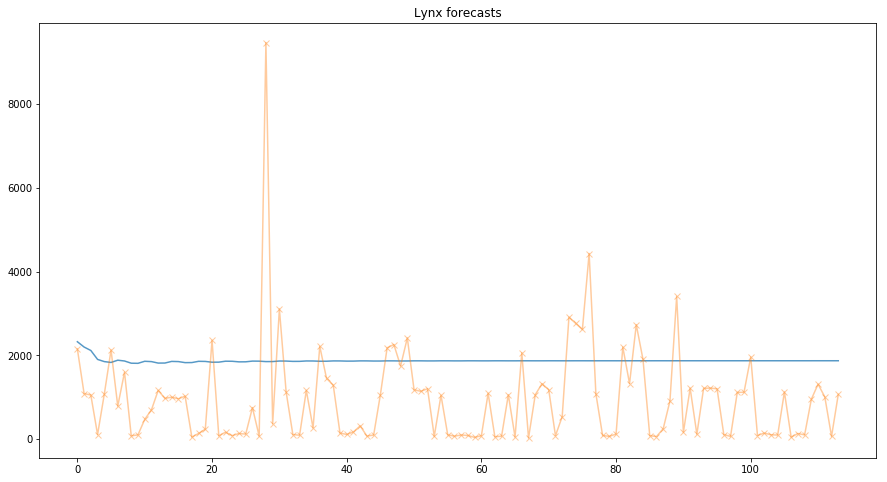

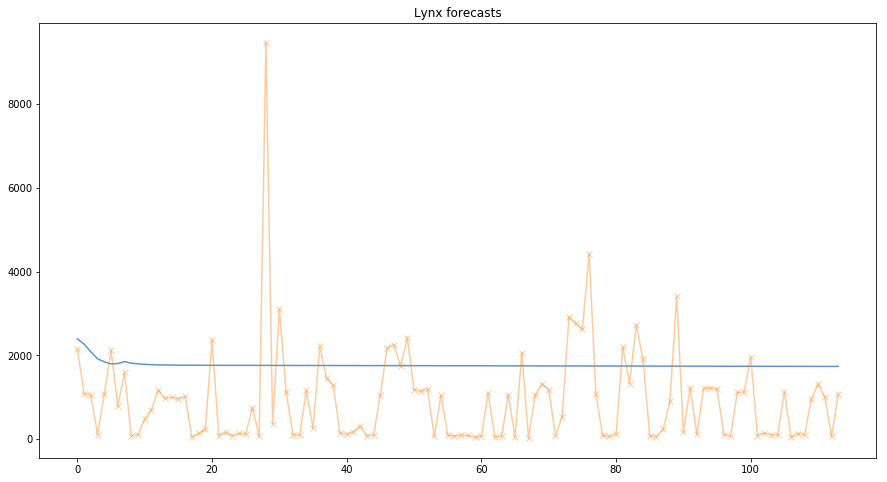

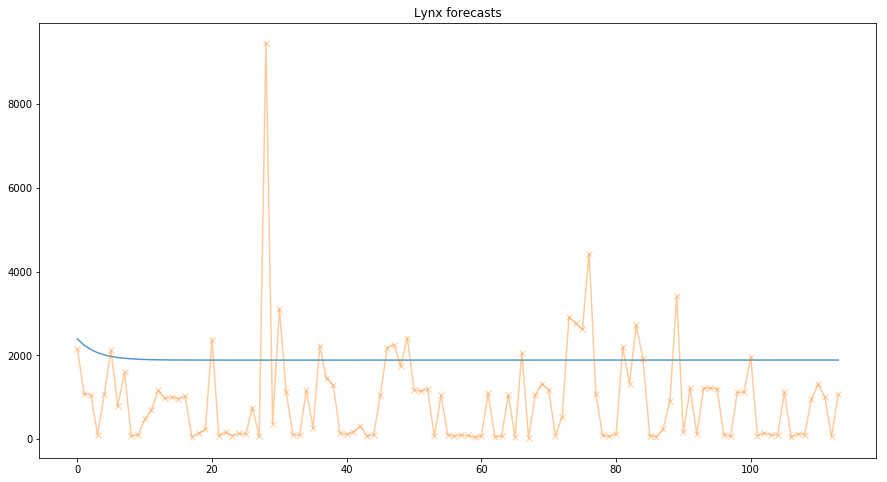

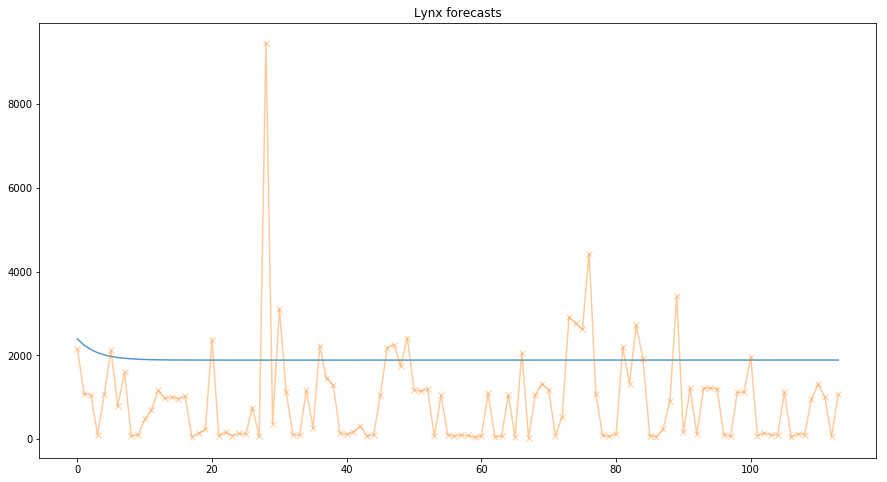

KeyError: 64

In [7]:
# #############################################################################
x = 2
while x <=96:
    preds = predict[x]
    conf_interval = conf_intervals[x]
    
    # Plot the points and the forecasts
    plt.figure(figsize=(15, 8))
    plt.plot(preds, alpha=0.75)  # Forecasts
    plt.plot(test, alpha=0.4, marker='x')  # Test data
    plt.title("Lynx forecasts")
    #plt.xlabel("Year")
    #plt.axis([2600, 2800, 0, 5000])
    plt.show()

    if x == 96:
        break

    x = x * 2
    if x > 100:
        x = 96